### Logistic Regression

In [ ]:
# This code appears in every demonstration Notebook.
# By default, when you run each cell, only the last output of the codes will show.
# This code makes all outputs of a cell show.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

1. Import libraries

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plot
import seaborn as sns
# api submodule gives access to the most commonly used
# classes and functions directly.

2. Import Default dataset

In [ ]:
df = pd.read_csv('Default.csv')

In [ ]:
df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [ ]:
df['default'].value_counts()

,count
default,
No,9667
Yes,333


<Axes: xlabel='default'>

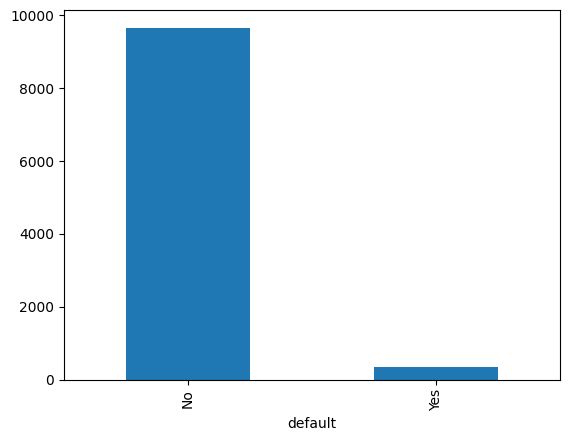

In [ ]:
df['default'].value_counts().plot(kind = 'bar')

array([[<Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'income'}>]], dtype=object)

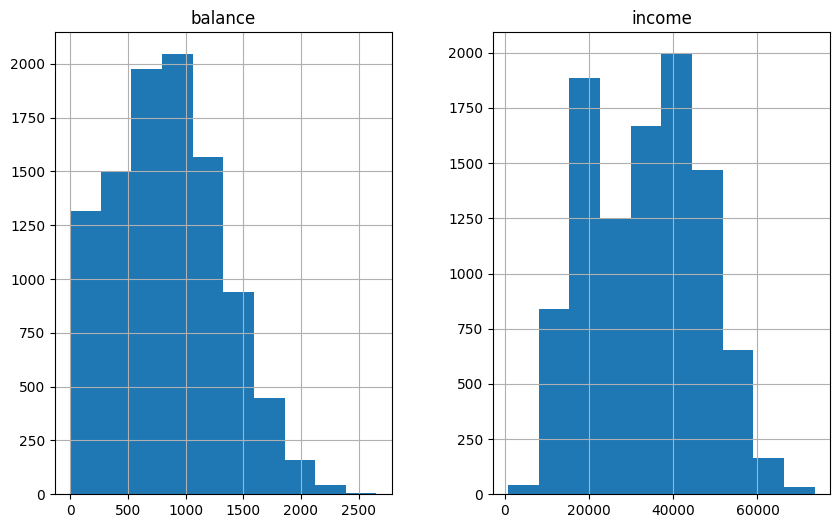

In [ ]:
df.hist(figsize = (10,6))

<Axes: xlabel='student'>

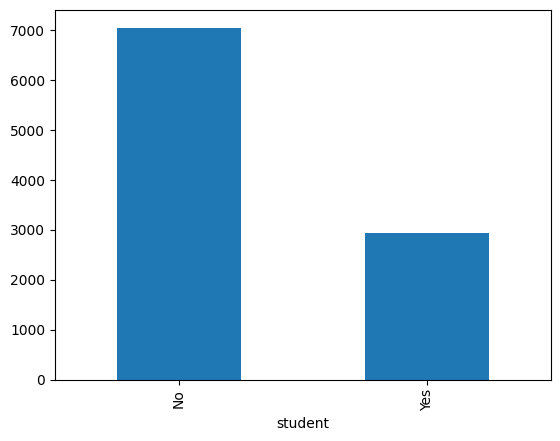

In [ ]:
df['student'].value_counts().plot(kind = 'bar')

<Axes: title={'center': 'balance'}, xlabel='default'>

Text(0.5, 1.0, 'Boxplot of Balance by Default')

Text(0.5, 0.98, '')

<Axes: title={'center': 'income'}, xlabel='default'>

Text(0.5, 1.0, 'Boxplot of Income by Default')

Text(0.5, 0.98, '')

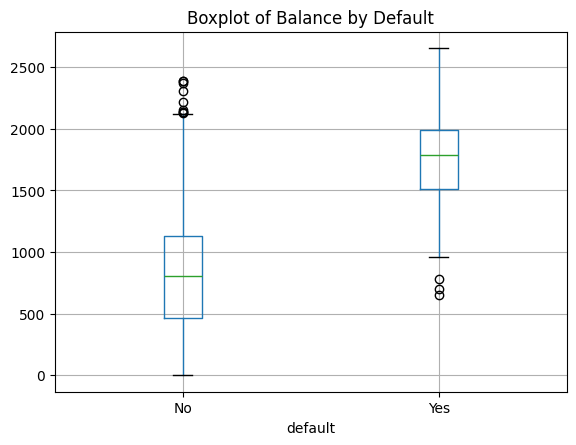

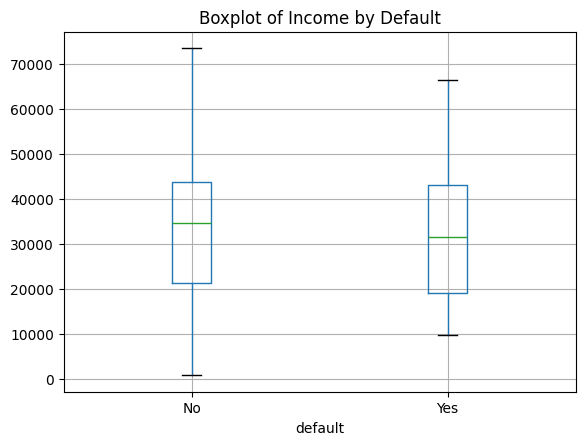

In [ ]:
df.boxplot(column='balance', by='default')
plt.title('Boxplot of Balance by Default')
plt.suptitle('')  # Remove the automatic title generated by boxplot

df.boxplot(column='income', by='default')
plt.title('Boxplot of Income by Default')
plt.suptitle('')  # Remove the automatic title generated by boxplot

plt.show()

<Axes: xlabel='balance', ylabel='income'>

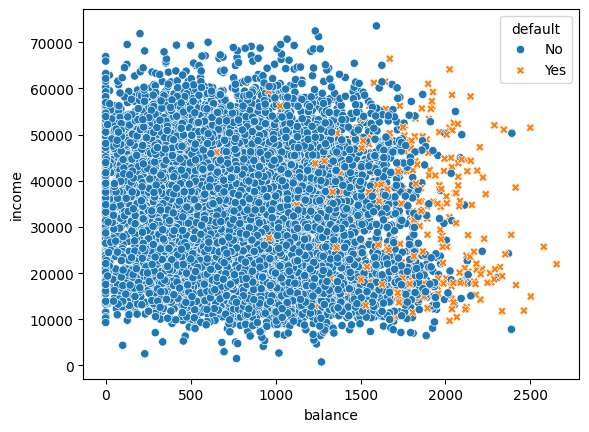

In [ ]:
sns.scatterplot(x='balance', y='income', hue='default', data=df, style= 'default')

In [ ]:
df['default'] = df['default'].map({'No':0, 'Yes':1})
df['student'] = df['student'].map({'No':0, 'Yes':1})

In [ ]:
df= pd.get_dummies(df, columns=['default'], drop_first=True, dtype = int)
df= pd.get_dummies(df, columns=['student'], drop_first=True, dtype = int)
df.head()


,balance,income,default_1,student_1
0,729.526495,44361.625074,0,0
1,817.180407,12106.134700,0,1
2,1073.549164,31767.138947,0,0
3,529.250605,35704.493935,0,0
4,785.655883,38463.495879,0,0


In [ ]:
col=['balance', 'income','student_1']
x=df[col]
y=df['default_1']
x_con=sm.add_constant(x)
model = sm.Logit(y,x_con)
res = model.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              default_1   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Mon, 17 Feb 2025   Pseudo R-squ.:                  0.4619
Time:                        22:33:58   Log-Likelihood:                -785.77
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                3.257e-292
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.8690      0.492    -22.079      0.000     -11.834      -9.904
balance        0.0057      0.000     24.737      0.000       0.005       0.006
income      3.033e-06    8.2e-06      0.370      0.712    -1.3e-05    1.91e-05
student_1     -0.6468      0.236     -2.738      0.006      -1.110      -0.184
==============================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [ ]:
cust_new = pd.DataFrame({'Intercept': [1], 'balance':[2000], 'income': [0], 'student_1':[1]})

pred_cust_new = res.predict(cust_new)
pred_cust_new


,0
0,0.489299


In [ ]:
import math
math.exp(0.489299)

1.6311723672524034

In [ ]:
# Use patsy library to prepare design matices
# without changing the column to dummy variables we can use
import patsy
y, X = patsy.dmatrices('default ~ balance + income + student',
                      data = default,
                      return_type = 'dataframe')

In [ ]:
y.head()
X.head()

,default[No],default[Yes]
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


,Intercept,student[T.Yes],balance,income
0,1.0,0.0,729.526495,44361.625074
1,1.0,1.0,817.180407,12106.134700
2,1.0,0.0,1073.549164,31767.138947
3,1.0,0.0,529.250605,35704.493935
4,1.0,0.0,785.655883,38463.495879


In [ ]:
y.columns
X.columns

Index(['default[No]', 'default[Yes]'], dtype='object')

Index(['Intercept', 'student[T.Yes]', 'balance', 'income'], dtype='object')

In [ ]:
# Fit a single variable model - balance
logit_model_1 = sm.Logit(y['default[Yes]'],
                         X[['Intercept', 'balance']])
logit_res_1 = logit_model_1.fit()
logit_res_1.summary()

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           default[Yes]   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Mon, 26 Feb 2024   Pseudo R-squ.:                  0.4534
Time:                        14:39:00   Log-Likelihood:                -798.23
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                6.233e-290
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.6513      0.361    -29.491      0.000     -11.359      -9.943
balance        0.0055      0.000     24.952      0.000       0.005       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [ ]:
# Make probability predictions using the balance model
# balance = 1000
b1000 = pd.DataFrame({'Intercept': [1], 'balance':[1000]})

In [ ]:
pred_b1000 = logit_res_1.predict(b1000)
pred_b1000

0    0.005752
dtype: float64

In [ ]:
# The odds
pred_b1000/(1-pred_b1000)

0    0.005785
dtype: float64

In [ ]:
# Increase balance by 100
b1100 = pd.DataFrame({'Intercept': [1], 'balance':[1100]})
pred_b1100 = logit_res_1.predict(b1100)
pred_b1100

0    0.009927
dtype: float64

In [ ]:
# the odds
pred_b1100/(1-pred_b1100)

0    0.010027
dtype: float64

In [ ]:
def odds_ratio(p1,p2):
    return (p2/(1-p2))/(p1/(1-p1))

In [ ]:
odds_ratio(pred_b1000, pred_b1100)

0    1.733065
dtype: float64

In [ ]:
import math
math.exp(0.55)

1.7332530178673953

In [ ]:
X.head()

,Intercept,student[T.Yes],balance,income
0,1.0,0.0,729.526495,44361.625074
1,1.0,1.0,817.180407,12106.134700
2,1.0,0.0,1073.549164,31767.138947
3,1.0,0.0,529.250605,35704.493935
4,1.0,0.0,785.655883,38463.495879


In [ ]:
# Fit a single variable model - student
logit_model_2 = sm.Logit(y['default[Yes]'],
                         X[['Intercept', 'student[T.Yes]']])
logit_res_2 = logit_model_2.fit()
logit_res_2.summary()

Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           default[Yes]   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Mon, 26 Feb 2024   Pseudo R-squ.:                0.004097
Time:                        15:26:58   Log-Likelihood:                -1454.3
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                 0.0005416
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -3.5041      0.071    -49.554      0.000      -3.643      -3.366
student[T.Yes]     0.4049      0.115      3.520      0.000       0.179       0.630
==================================================================================
"""

In [ ]:
math.exp(0.4049)

1.4991525773030239

In [ ]:
# Fit a full model
logit_model_full = sm.Logit(y['default[Yes]'],
                         X)
logit_res_full = logit_model_full.fit()
logit_res_full.summary()

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           default[Yes]   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Mon, 26 Feb 2024   Pseudo R-squ.:                  0.4619
Time:                        15:36:03   Log-Likelihood:                -785.77
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                3.257e-292
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -10.8690      0.492    -22.079      0.000     -11.834      -9.904
student[T.Yes]    -0.6468      0.236     -2.738      0.006      -1.110      -0.184
balance            0.0057      0.000     24.737      0.000       0.005       0.006
income          3.033e-06    8.2e-06      0.370      0.712    -1.3e-05    1.91e-05
==================================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [ ]:
# make classification
# Get the predicted probabilities

pred_prob = logit_res_full.predict(X)
pred_prob

0       0.001429
1       0.001122
2       0.009812
3       0.000442
4       0.001936
          ...   
9995    0.001323
9996    0.001560
9997    0.002896
9998    0.147144
9999    0.000033
Length: 10000, dtype: float64

In [ ]:
# Classify based on a threshhold
pred_classification = (pred_prob>0.5).astype(int)
pred_classification

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Length: 10000, dtype: int32

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y['default[Yes]'], pred_classification)
print(accuracy)

0.9732
